<a href="https://colab.research.google.com/github/OttomanZ/OttomanZ/blob/main/Unicorn_Umbrella.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import sys
import tensorflow as tf
import pathlib
import numpy as np
import matplotlib.pyplot as plt

print(f"[Info] Version: {tf.__version__}")

[Info] Version: 2.8.0


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 2s 1us/step


In [6]:
class_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

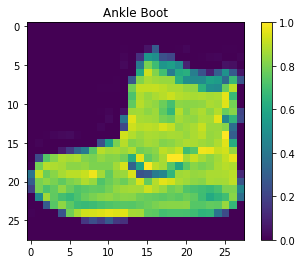

In [19]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.title(class_names[train_labels[0]])
plt.show()

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

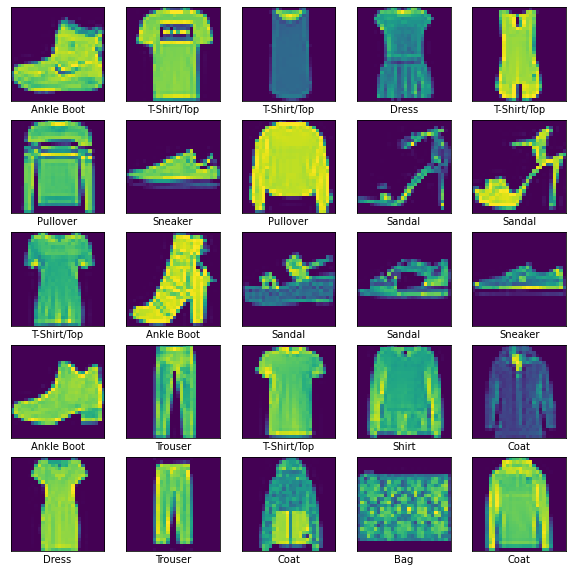

In [18]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()


In [22]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Flatten(input_shape=(28,28)),
     tf.keras.layers.Dense(128, activation='relu'),
     tf.keras.layers.Dense(10)
    ]
)

In [23]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4949 - accuracy: 0.8247
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3714 - accuracy: 0.8659
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3336 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step 

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 - 1s - loss: 0.3326 - accuracy: 0.8803 - 1s/epoch - 3ms/step


In [26]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_images)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [50]:
for pred in predictions:
  print(f'Prediction {class_names[int(np.argmax(pred))]}, Confidence: {max(pred)}')


Streaming output truncated to the last 5000 lines.
Prediction Pullover, Confidence: 0.9642769694328308
Prediction Dress, Confidence: 0.9998780488967896
Prediction T-Shirt/Top, Confidence: 0.4603762626647949
Prediction Coat, Confidence: 0.9829109311103821
Prediction Shirt, Confidence: 0.8063845634460449
Prediction Dress, Confidence: 0.954016387462616
Prediction Dress, Confidence: 0.9135521054267883
Prediction Ankle Boot, Confidence: 0.9982810020446777
Prediction Coat, Confidence: 0.562244176864624
Prediction Sneaker, Confidence: 0.6572343707084656
Prediction T-Shirt/Top, Confidence: 0.9945098161697388
Prediction Bag, Confidence: 0.99994957447052
Prediction Dress, Confidence: 0.8534317016601562
Prediction Sandal, Confidence: 0.7798554301261902
Prediction Shirt, Confidence: 0.5111767649650574
Prediction Coat, Confidence: 0.5467716455459595
Prediction T-Shirt/Top, Confidence: 0.9831570982933044
Prediction Trouser, Confidence: 1.0
Prediction Dress, Confidence: 0.9886370301246643
Prediction 

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


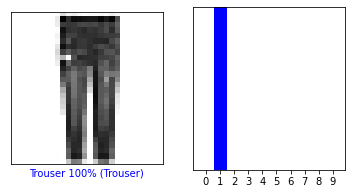

In [41]:
i = 200
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()


In [48]:
class_names[np.argmax(predictions[200])]

'Trouser'

Text(0.5, 1.0, 'Sandal')

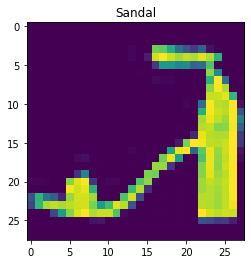

In [58]:
image_id = 1200
plt.imshow(test_images[image_id])
# tf.keras models are optimized to make predictions on a batch, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:
prediction = probability_model.predict(np.expand_dims(test_images[image_id],0))
plt.title(class_names[np.argmax(prediction)])